<a href="https://colab.research.google.com/github/katarinamahadevi/blank-app/blob/main/Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT DATA MINING**

**Analisis Sentimen - Ulasan Kopi Kenangan**

Kelompok 6:

1. Anindya Sita Paramastri (22082010137)
2. Mahadevi Katarina Sabila (22082010139)
3. Belinda Ingridina (22082010143)

## **Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
# library for text preprocessing
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# library for vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# library for pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# library untuk evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('max_colwidth', 180)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Import Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Final Project/ulasan_kopken.csv', sep=';', encoding='ISO-8859-1')
df.head()

,ï»¿userName,content,score,at,replyContent
0,Pengguna Google,sangat membantu pas lagi pengen ngopi tinggal lewat aplikasi aja,5,2025-11-19 10:21:58,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ..."
1,Pengguna Google,top bgt,5,2025-11-19 07:00:41,"Hi Kak erika ameliani surbakti, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan janga..."
2,Pengguna Google,mantap kali lah kopi kenangan ini,5,2025-11-19 03:45:24,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ..."
3,Pengguna Google,good jobb,5,2025-11-18 20:20:16,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ..."
4,Pengguna Google,mantap,5,2025-11-18 13:03:25,"Hi Kak Risal Fauzi, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿userName   314 non-null    object
 1   content       314 non-null    object
 2   score         314 non-null    int64 
 3   at            314 non-null    object
 4   replyContent  314 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.4+ KB


In [ ]:
df.isnull().sum()

,0
ï»¿userName,0
content,0
score,0
at,0
replyContent,0


In [ ]:
df['length'] = df['content'].apply(len)
df.head()

,ï»¿userName,content,score,at,replyContent,length
0,Pengguna Google,sangat membantu pas lagi pengen ngopi tinggal lewat aplikasi aja,5,2025-11-19 10:21:58,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ...",64
1,Pengguna Google,top bgt,5,2025-11-19 07:00:41,"Hi Kak erika ameliani surbakti, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan janga...",7
2,Pengguna Google,mantap kali lah kopi kenangan ini,5,2025-11-19 03:45:24,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ...",33
3,Pengguna Google,good jobb,5,2025-11-18 20:20:16,"Hi Kak, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak teman-teman ...",9
4,Pengguna Google,mantap,5,2025-11-18 13:03:25,"Hi Kak Risal Fauzi, terima kasih atas review baiknya untuk Kopi Kenangan. Yuk terus gunakan aplikasi Kopi Kenangan untuk mendapatkan promo menarik lainnya dan jangan lupa ajak ...",6


In [ ]:
df["contentLength"] = df["content"].apply(len)
df["contentLength"].describe()

,contentLength
count,314.000000
mean,39.547771
std,45.813408
min,2.000000
25%,10.250000
50%,24.000000
75%,50.000000
max,334.000000


In [ ]:
text = " ".join(review for review in df['content'])

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

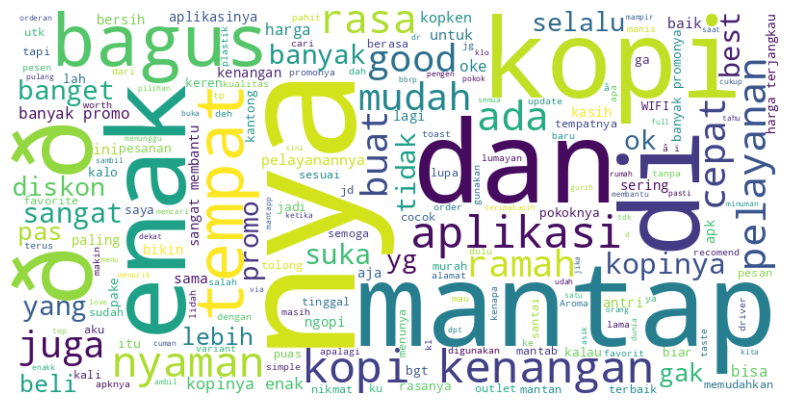

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## **Data Cleaning**

In [ ]:
def clean_text(text):

    # menghilangkan Nama Akun
    text = re.sub(r'@[^\s]+', '', text)

    # menghilangkan punctuation (tanda baca)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # menghilangkan angka
    text = re.sub('\w*\d\w*', '', text)

    # menghilangkan URL
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', '', text)

    # menghilangkan Hashtag
    text = re.sub('#[^\s]+', '', text)

    # menghilangkan huruf tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)

    return text

clean = lambda x: clean_text(x)

In [ ]:
dfx = pd.DataFrame(df.content.apply(clean))
dfx

,content
0,sangat membantu pas lagi pengen ngopi tinggal lewat aplikasi aja
1,top bgt
2,mantap kali lah kopi kenangan ini
3,good jobb
4,mantap
...,...
309,mantap
310,coffee not to bad
311,ok simple
312,"aplikasi simple dan user friendly namun tetap interaktif, banyak diskon juga"


In [ ]:
def Punctuation(string):

  #punctuation marks
  punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''

  # traverse the given string and if any punctuation
  # marks occur replace it with null
  for x in string.lower():
    if x in punctuation:
      string = string.replace(x, "")

  # Print string without punctuation
  return(string)

CleanPunc = lambda x: Punctuation(x)

In [ ]:
dfx = pd.DataFrame(dfx.content.apply(CleanPunc))
dfx.head()

,content
0,sangat membantu pas lagi pengen ngopi tinggal lewat aplikasi aja
1,top bgt
2,mantap kali lah kopi kenangan ini
3,good jobb
4,mantap


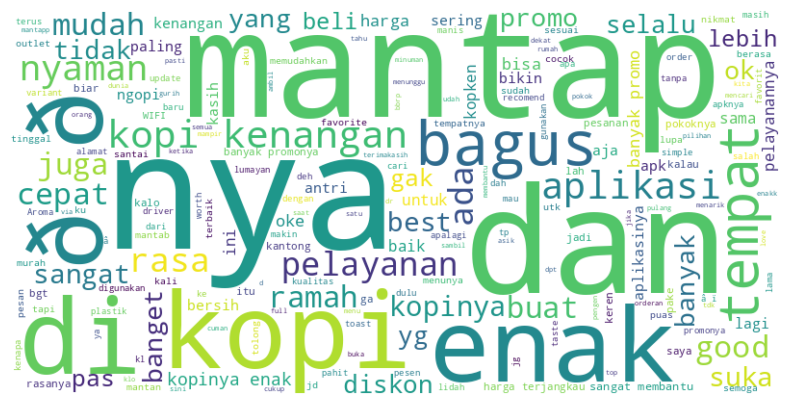

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Case Folding**

In [ ]:
def case_fold(text):
    return text.lower()

In [ ]:
dfx['content'] = dfx['content'].apply(case_fold)
dfx.head()

,content
0,sangat membantu pas lagi pengen ngopi tinggal lewat aplikasi aja
1,top bgt
2,mantap kali lah kopi kenangan ini
3,good jobb
4,mantap


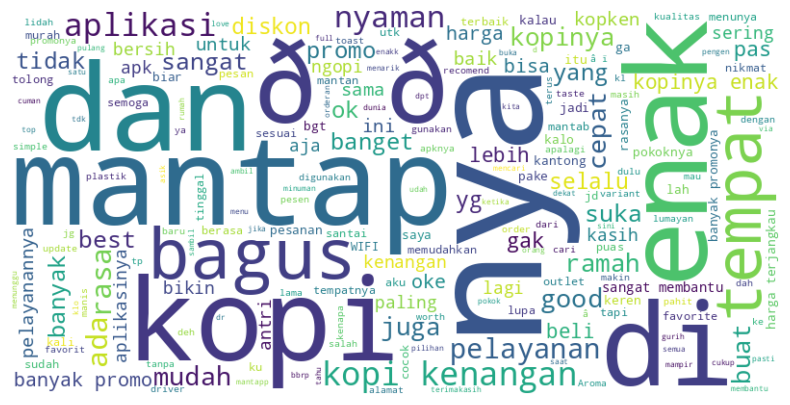

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Tokenizing**

In [ ]:
def tokenizing(text):
    return word_tokenize(text)

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
dfx['content'] = dfx['content'].apply(tokenizing)
dfx.head()

,content
0,"[sangat, membantu, pas, lagi, pengen, ngopi, tinggal, lewat, aplikasi, aja]"
1,"[top, bgt]"
2,"[mantap, kali, lah, kopi, kenangan, ini]"
3,"[good, jobb]"
4,[mantap]


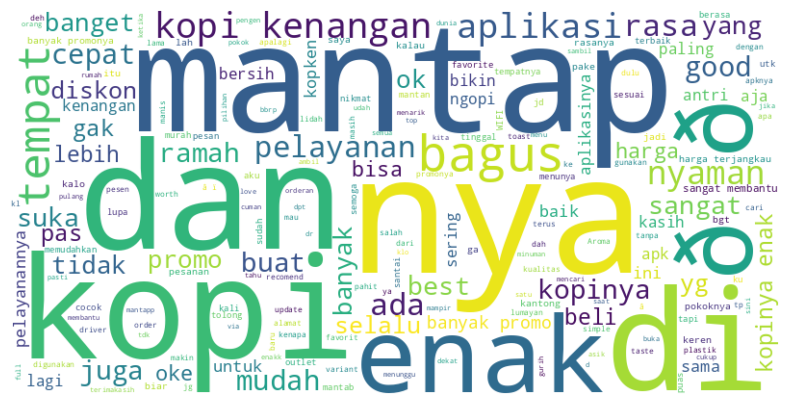

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Stopword Removal**

In [ ]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords = open(stopwordsfile, 'r')
  row = file_stopwords.readline()
  while row:
    word = row.strip()
    stopwords.append(word)
    row = file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [ ]:
stop_words_indo = get_stopword('/content/drive/MyDrive/Data Mining/Text Classification/stopwordsindo.txt')

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def stopwords(text):

  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil = ' '.join(filtered)
  return hasil

st = lambda x: stopwords(x)

In [ ]:
text = re.sub(r'[^a-zA-Z\s]', '', text)

In [ ]:
stopwords_custom = [
    "yang","dan","di","dari","untuk","dengan","pada","sebagai","agar","kalau",
    "aja","nya","pun","itu","ini","sangat","banget","sudah","masih","jadi",
    "karena","lebih","akan","atau","bisa","juga","tidak","tiap","semua","banyak",
    "lagi","kopi","kenangan","kopken","kopinya","tempat","mantap",
    "enak","bagus","outlet"
]

In [ ]:
def remove_custom_stopwords(text):
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords_custom]
    return " ".join(tokens)

dfx["content"] = dfx["content"].apply(lambda x: " ".join(x))  # list to string
dfx["content"] = dfx["content"].apply(remove_custom_stopwords)


In [ ]:
dfx["content"] = dfx["content"].str.replace(r"(.)\1{2,}", r"\1\1", regex=True)

In [ ]:
dfx = pd.DataFrame(dfx.content.apply(st))
dfx

,content
0,membantu pas pengen ngopi tinggal aplikasi
1,top bgt
2,kali
3,good jobb
4,
...,...
309,
310,coffee not to bad
311,ok simple
312,aplikasi simple user friendly interaktif diskon


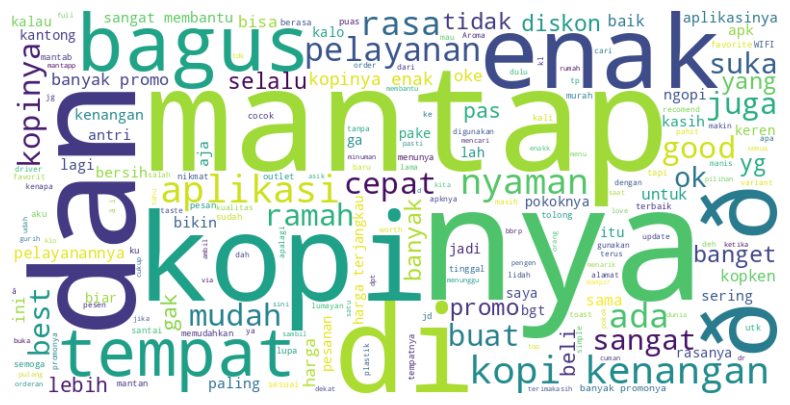

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Stemming**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def sastrawi_stemming(text):
    return stemmer.stem(str(text))

In [ ]:
dfx["content"] = dfx["content"].apply(sastrawi_stemming)

In [ ]:
dfx

,content
0,bantu pas ken ngopi tinggal aplikasi
1,top bgt
2,kali
3,good jobb
4,
...,...
309,
310,coffee not to bad
311,ok simple
312,aplikasi simple user friendly interaktif diskon


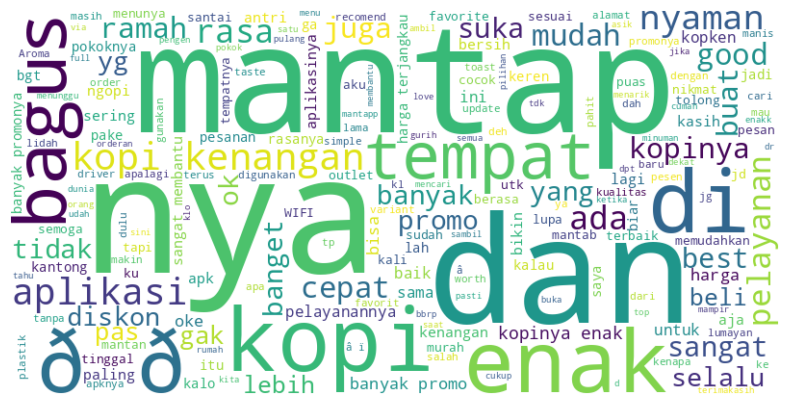

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Normalize Text**

In [ ]:
NORMALIZER = {
    "pengen": "ingin",
    "ken": "ingin",          # kalau masih ada "ken"
    "bgt": "banget",
    "bngt": "banget",
    "bgtt": "banget",
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "nggak": "tidak",
    "tp": "tapi",
    "tpi": "tapi",
    "sm": "sama",
    "udh": "sudah",
    "udah": "sudah",
    "mksh": "terima kasih",
    "makasih": "terima kasih",
    "trimakasih": "terima kasih",
    "terimakasih": "terima kasih",
    "mantul": "mantap",
    "mantapp": "mantap",
    "puass": "puas",
    "puasss": "puas",
    "okee": "oke",
    "ok": "oke",
    "kopken": "kopi kenangan",
    "skarang": "sekarang",
    "sukak": "suka",
    "sngat": "sangat",
    "memudhkan": "memudahkan",
    "bett": "banget",
    "mamtap": "mantap",
    "mantaff": "mantap",
    "mantafff": "mantap",
    "mantaap": "mantap",
    "mantaapp": "mantap",
    "recomended": "recommended",
    "recomend": "recommended",
    "goodd": "good",
    "juwara": "juara",
    "gajelas": "tidak jelas",
    "apk": "aplikasi",
    "banding": "membandingkan",
    "stategis": "strategis",
    "enakk": "enak", "wnak" : "enak",
    # tambahin sendiri kalau nemu typo lain
}

In [ ]:
def normalize_text(text):
    text = str(text).lower()

    # rapikan huruf berulang berlebihan → mantapppp → mantapp
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    tokens = text.split()
    fixed = []
    for word in tokens:
        if word in NORMALIZER:
            fixed.append(NORMALIZER[word])
        else:
            fixed.append(word)
    return " ".join(fixed)

dfx["content"] = dfx["content"].apply(normalize_text)

In [ ]:
dfx

,content
0,bantu pas ingin ngopi tinggal aplikasi
1,top banget
2,kali
3,good jobb
4,
...,...
309,
310,coffee not to bad
311,oke simple
312,aplikasi simple user friendly interaktif diskon


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dfx)

https://docs.google.com/spreadsheets/d/1QqX1MSXLpY3eu7LdUIOHy32xDvPpGcwRUsflG42lf4k/edit#gid=0


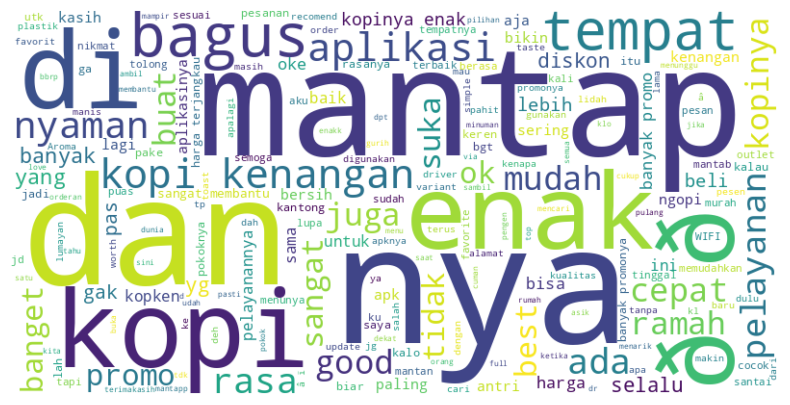

In [ ]:
# gabungkan semua text
text = " ".join(review for review in df['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Labeling**

In [ ]:
positive_words = [
    "mantap","mantap banget","enak","nyaman","ramah","cepat","bagus","bersih",
    "murah","promo","diskon","puas","oke","good","rekomendasi","favorit",
    "terbaik","worth","keren","simple","mudah", "top", "bantu", "suka", "fav",
    "sesuai", "gacor", "nice", "gas", "cocok", "bantu", "bagus", "favorite",
    "kelas", "best", "love", "recommend", "mantep", "mantab", "mantep", "" , "sahabat",
    "cocok",
    "juara",
    "best",
    "lezat",
    "nikmat",
    "sukses",
    "favorite",
    "fav",
    "memudahkan",
    "ringkas",
    "mantap",
    "recommended",
    "baik",
    "strategis", "point", "pelihara", "terima kasih", "suka", "terbaik", "asik", "aman", "praktis", "terjangkau" "enak", "nikmat", "lembut"
    ]

negative_words = [
    "lama","antri","pahit","mahal","kecewa","buruk","jelek","tidak enak",
    "ga enak","gak enak","susah","ribet","lambat","error","kurang",
    "kecewa","mengecewakan",  "tidak jelas",
    "gajelas",
    "maintenance",
    "kampret",
    "salah",
    "tidak sesuai",
    "bingung",
    "mahalnya",
    "banding",
    "keliru", "kadang", "tolong",
]


In [ ]:
def label_sentiment(text):
    if pd.isna(text):
        return "netral"

    text = str(text).lower()
    words = text.split()

    score = 0
    for w in words:
        if w in positive_words:
            score += 1
        if w in negative_words:
            score -= 1

    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "negatif"

In [ ]:
dfx["label"] = dfx["content"].apply(label_sentiment)

In [ ]:
dfx

,content,label
0,bantu pas ingin ngopi tinggal aplikasi,positif
1,top banget,positif
2,kali,negatif
3,good jobb,positif
4,,negatif
...,...,...
309,,negatif
310,coffee not to bad,negatif
311,oke simple,positif
312,aplikasi simple user friendly interaktif diskon,positif


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dfx)

https://docs.google.com/spreadsheets/d/1jZEdAbvD6Q34pNwnQFhLppI_vYjdbDFXlk2bxA1e1yE/edit#gid=0


In [ ]:
# drop missing value
dfx = dfx.dropna()                                # hapus NaN
dfx = dfx[dfx["content"].str.strip() != ""]        # hapus blank content

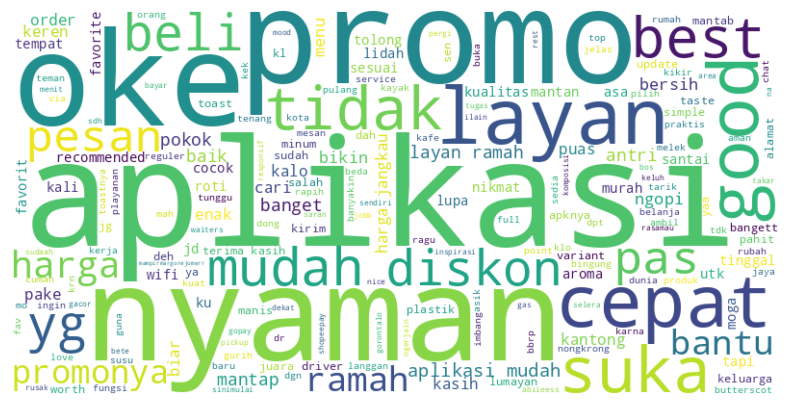

In [ ]:
# gabungkan semua text
text = " ".join(review for review in dfx['content'])

# generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# tampilkan
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dfx)

https://docs.google.com/spreadsheets/d/1NWArWif7NX6KiJYRubxLqmRcIK43UjSNxsg5Nirb-Vc/edit#gid=0


In [ ]:
# setelah dilakukan pengecekan label
df_revised = pd.read_csv('/content/drive/MyDrive/Data Mining/Final Project/sentiment.csv')

In [ ]:
df_revised.head()

,content,label
0,bantu pas ingin ngopi tinggal aplikasi,positif
1,top banget,positif
2,kali,negatif
3,good jobb,positif
4,puas rasamau sesuai selera,positif


## **Smote**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Load Dataframe
df = df_revised.copy()

In [ ]:
# Pisahkan fitur dan target
X = df["content"]
y = df["label"]

In [ ]:
# Vectorizer (ubah teks → angka)
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, # 80%, 20%
    random_state=42, stratify=y
)

In [ ]:
print("Sebelum SMOTE:", y_train.value_counts())

Sebelum SMOTE: label
positif    160
negatif     52
Name: count, dtype: int64


In [ ]:
# SMOTE (hanya train)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Sesudah SMOTE:", y_train_smote.value_counts())

Sesudah SMOTE: label
positif    160
negatif    160
Name: count, dtype: int64


## **Data Classification**

### **Skenario 1 - Random Forest**

In [ ]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
# Load Dataframe
df = df_revised.copy()

In [ ]:
X = df['content']          # kolom teks
y = df['label']            # kolom label sentiment (positif/negatif)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80%, 20%
    random_state=42,
    stratify=y
)

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words=None
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train_tfidf, y_train)

# Predict
y_pred = rf.predict(X_test_tfidf)

In [ ]:
# Evaluation
print("=== Accuracy ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Accuracy ===
0.8490566037735849

=== Classification Report ===
              precision    recall  f1-score   support

     negatif       1.00      0.38      0.56        13
     positif       0.83      1.00      0.91        40

    accuracy                           0.85        53
   macro avg       0.92      0.69      0.73        53
weighted avg       0.87      0.85      0.82        53


=== Confusion Matrix ===
[[ 5  8]
 [ 0 40]]


In [ ]:
# Konversi label ke binary
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

if y_test_binary.shape[1] == 1:
    y_test_binary = y_test_binary.ravel()

In [ ]:
# Probabilitas kelas positif
y_proba = rf.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
auc_score = roc_auc_score(y_test_binary, y_proba)

print("AUC Score:", auc_score)

AUC Score: 0.9


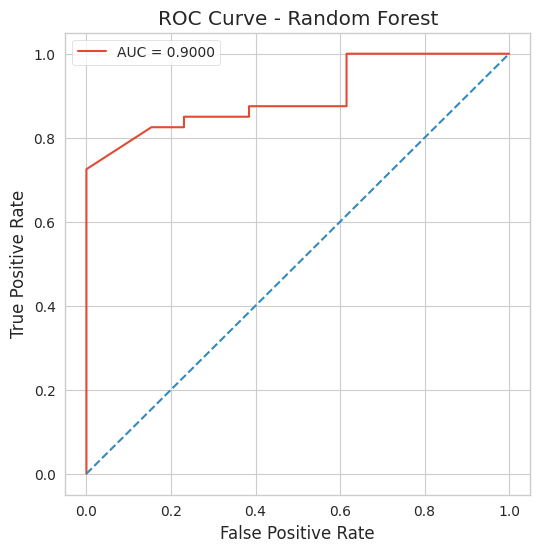

In [ ]:
# Plot ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # garis diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [ ]:
# Pipeline TF-IDF + Random Forest
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])

X = df_revised['content']
y = df_revised['label']

In [ ]:
# Accuracy
scores_accuracy_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring="accuracy")
print("\nAkurasi (Random Forest):", scores_accuracy_rf)
print("Rata-Rata Akurasi RF: %0.2f (+/- %0.2f)" %
      (scores_accuracy_rf.mean(), scores_accuracy_rf.std()))

# Precision
scores_precision_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring="precision_macro")
print("\nPrecision (Random Forest):", scores_precision_rf)
print("Rata-Rata Precision RF: %0.2f (+/- %0.2f)" %
      (scores_precision_rf.mean(), scores_precision_rf.std()))

# Recall
scores_recall_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring="recall_macro")
print("\nRecall (Random Forest):", scores_recall_rf)
print("Rata-Rata Recall RF: %0.2f (+/- %0.2f)" %
      (scores_recall_rf.mean(), scores_recall_rf.std()))

# F1
scores_f1_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring="f1_macro")
print("\nF1-score (Random Forest):", scores_f1_rf)
print("Rata-Rata F1-score RF: %0.2f (+/- %0.2f)" %
      (scores_f1_rf.mean(), scores_f1_rf.std()))



Akurasi (Random Forest): [0.77358491 0.77358491 0.77358491 0.79245283 0.75471698]
Rata-Rata Akurasi RF: 0.77 (+/- 0.01)

Precision (Random Forest): [0.72333333 0.72333333 0.88461538 0.89215686 0.6377551 ]
Rata-Rata Precision RF: 0.77 (+/- 0.10)

Recall (Random Forest): [0.56442308 0.56442308 0.53846154 0.57692308 0.55192308]
Rata-Rata Recall RF: 0.56 (+/- 0.01)

F1-score (Random Forest): [0.55833333 0.55833333 0.50621118 0.57289377 0.54461335]
Rata-Rata F1-score RF: 0.55 (+/- 0.02)


In [ ]:
# Tabel hasil CV
cv_results = pd.DataFrame({
    "Accuracy": scores_accuracy_rf,
    "Precision": scores_precision_rf,
    "Recall": scores_recall_rf,
    "F1-Score": scores_f1_rf
})

# MTambah row mean & std
cv_results.loc["Mean"] = cv_results.mean()
cv_results.loc["Std"] = cv_results.std()

cv_results

,Accuracy,Precision,Recall,F1-Score
0,0.773585,0.723333,0.564423,0.558333
1,0.773585,0.723333,0.564423,0.558333
2,0.773585,0.884615,0.538462,0.506211
3,0.792453,0.892157,0.576923,0.572894
4,0.754717,0.637755,0.551923,0.544613
Mean,0.773585,0.772239,0.559231,0.548077
Std,0.011933,0.099878,0.013051,0.022764


### **Skenario 2 - Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_nb = df_revised.copy()


In [ ]:
X = df_nb['content']
y = df_nb['label']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Model Naive Bayes
nb = MultinomialNB()

# Train
nb.fit(X_train_tfidf, y_train)

# Predict
y_pred = nb.predict(X_test_tfidf)


In [ ]:
# Evaluation
print("=== Accuracy ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Accuracy ===
0.7547169811320755

=== Classification Report ===
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        13
     positif       0.75      1.00      0.86        40

    accuracy                           0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53


=== Confusion Matrix ===
[[ 0 13]
 [ 0 40]]


In [ ]:
# ROC-AUC
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test).ravel()

y_proba = nb.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, thres = roc_curve(y_test_binary, y_proba)
auc_nb = roc_auc_score(y_test_binary, y_proba)

print("\nAUC Score:", auc_nb)


AUC Score: 0.9403846153846154


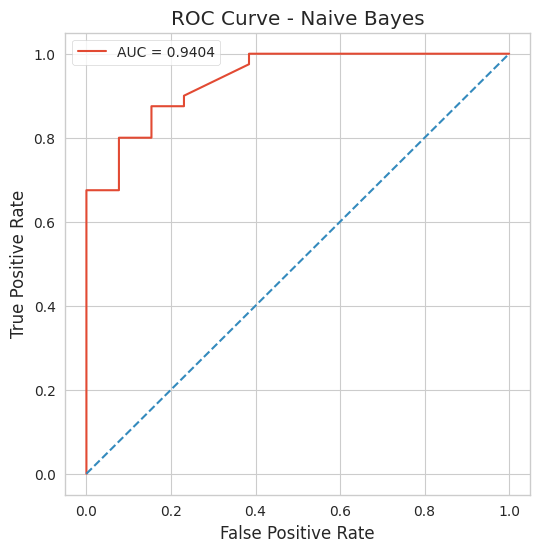

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_nb:.4f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [ ]:
# Cross Validation
scores_accuracy_nb = cross_val_score(pipeline_nb, X, y, cv=5, scoring="accuracy")
scores_precision_nb = cross_val_score(pipeline_nb, X, y, cv=5, scoring="precision_macro")
scores_recall_nb = cross_val_score(pipeline_nb, X, y, cv=5, scoring="recall_macro")
scores_f1_nb = cross_val_score(pipeline_nb, X, y, cv=5, scoring="f1_macro")

In [ ]:
# Tabel hasil
cv_results_nb = pd.DataFrame({
    "Accuracy": scores_accuracy_nb,
    "Precision": scores_precision_nb,
    "Recall": scores_recall_nb,
    "F1-Score": scores_f1_nb,
})

cv_results_nb.loc["Mean"] = cv_results_nb.mean()
cv_results_nb.loc["Std"] = cv_results_nb.std()

cv_results_nb

,Accuracy,Precision,Recall,F1-Score
0,0.773585,0.884615,0.538462,0.506211
1,0.754717,0.377358,0.500000,0.430108
2,0.754717,0.377358,0.500000,0.430108
3,0.754717,0.377358,0.500000,0.430108
4,0.754717,0.377358,0.500000,0.430108
Mean,0.758491,0.478810,0.507692,0.445328
Std,0.007547,0.202903,0.015385,0.030441


### **Skenario 3 - SVM (Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_svm = df_revised.copy()

In [ ]:
X = df_svm["content"]
y = df_svm["label"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [ ]:
# probability=True supaya bisa hitung ROC-AUC
svm_clf = SVC(
    kernel="linear",
    probability=True,
    random_state=42
)

In [ ]:
# Train
svm_clf.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
# Predict
y_pred = svm_clf.predict(X_test_tfidf)

In [ ]:
# === Evaluasi dasar ===
print("=== Accuracy SVM ===")
print(accuracy_score(y_test, y_pred))

=== Accuracy SVM ===
0.8301886792452831


In [ ]:
print("\n=== Classification Report SVM ===")
print(classification_report(y_test, y_pred))


=== Classification Report SVM ===
              precision    recall  f1-score   support

     negatif       1.00      0.31      0.47        13
     positif       0.82      1.00      0.90        40

    accuracy                           0.83        53
   macro avg       0.91      0.65      0.68        53
weighted avg       0.86      0.83      0.79        53



In [ ]:
print("\n=== Confusion Matrix SVM ===")
print(confusion_matrix(y_test, y_pred))


=== Confusion Matrix SVM ===
[[ 4  9]
 [ 0 40]]


In [ ]:
# === ROC & AUC ===
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test).ravel()

In [ ]:
# Probabilitas kelas positif (di-index 1)
y_proba = svm_clf.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
auc_svm = roc_auc_score(y_test_binary, y_proba)

In [ ]:
print("\nAUC Score SVM:", auc_svm)


AUC Score SVM: 0.9634615384615385


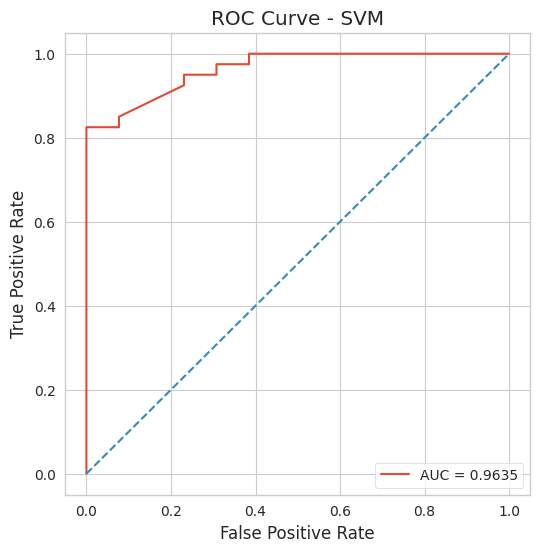

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_svm:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

In [ ]:
# Cross Validation SVM
pipeline_svm = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ("svm", SVC(kernel="linear", probability=True, random_state=42))
])

scores_accuracy_svm  = cross_val_score(pipeline_svm, X, y, cv=5, scoring="accuracy")
scores_precision_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring="precision_macro")
scores_recall_svm    = cross_val_score(pipeline_svm, X, y, cv=5, scoring="recall_macro")
scores_f1_svm        = cross_val_score(pipeline_svm, X, y, cv=5, scoring="f1_macro")

cv_results_svm = pd.DataFrame({
    "Accuracy": scores_accuracy_svm,
    "Precision": scores_precision_svm,
    "Recall": scores_recall_svm,
    "F1-Score": scores_f1_svm
})

cv_results_svm.loc["Mean"] = cv_results_svm.mean()
cv_results_svm.loc["Std"]  = cv_results_svm.std()

In [ ]:
print("\n=== Hasil Cross Validation SVM (per fold + Mean & Std) ===")
print(cv_results_svm)


=== Hasil Cross Validation SVM (per fold + Mean & Std) ===
      Accuracy  Precision    Recall  F1-Score
0     0.773585   0.695833  0.590385  0.598485
1     0.792453   0.772959  0.602885  0.614673
2     0.811321   0.900000  0.615385  0.631944
3     0.792453   0.772959  0.602885  0.614673
4     0.716981   0.502551  0.500962  0.474554
Mean  0.777358   0.728861  0.582500  0.586866
Std   0.032462   0.130755  0.041529  0.057145


In [ ]:
cv_results_svm

,Accuracy,Precision,Recall,F1-Score
0,0.773585,0.695833,0.590385,0.598485
1,0.792453,0.772959,0.602885,0.614673
2,0.811321,0.900000,0.615385,0.631944
3,0.792453,0.772959,0.602885,0.614673
4,0.716981,0.502551,0.500962,0.474554
Mean,0.777358,0.728861,0.582500,0.586866
Std,0.032462,0.130755,0.041529,0.057145
